In [1]:
%cd ../../..

/workspaces/Code


In [2]:
%matplotlib inline

from __future__ import annotations
from dataclasses import dataclass
import os
import gc
import tensorflow as tf

from Training import NewDataModelTrainer
from ModelBuilders import TestMobileNetBuilder, TestEfficientNetB2Builder, TestEfficientNetB0Builder, TestResNetBuilder, TestVgg16NetBuilder, ModelOptions
from itertools import product
import multiprocessing

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def enable_gpu_memory_growth():
    """
    Enables memory growth mode for GPUs.
    """
    gpus = tf.config.experimental.list_physical_devices('GPU')
    assert len(gpus) > 0, "No GPUs detected!"
            
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
@dataclass
class ModelNN:
    modelNN: int
    trainable_froms: list[int]

@dataclass
class BuilderTests:
    def __init__(self, 
        ingest_denses: list[int],
        output_denses: list[int],
        modelNNs: list[ModelNN],
        epochs_list: list[int],
        batch_list: list[int],
        builder_label: str):

        self.ingest_denses = ingest_denses
        self.output_denses = output_denses
        self.modelNNs = modelNNs
        self.epochs_list = epochs_list
        self.batch_list = batch_list

        self.builder_label = builder_label
        
    def generate_options(self):
        tests = product(self.ingest_denses, self.output_denses, self.modelNNs, self.epochs_list, self.batch_list)

        for ingest_dense, output_dense, modellNN, epochs, batch_size in tests:
            for trainable_from in modellNN.trainable_froms:
                if trainable_from > modellNN.modelNN:
                    continue

                yield ModelOptions(
                    builder_label=self.builder_label,
                    model_nn=modellNN.modelNN,
                    ingest_dense=ingest_dense,
                    output_dense=output_dense,
                    trainable_from_index=trainable_from,
                    epochs=epochs,
                    batch_size=batch_size)


In [5]:
mobile_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(35, [0]),
        ModelNN(54, [0]),
        ModelNN(72, [0]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/MobileNet")

for test in mobile_tests.generate_options():
    print(test.representation())

def run_mobile_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
    enable_gpu_memory_growth()

    model_builder = TestMobileNetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

nn35-train0-id64-od8-e6-b16
nn54-train0-id64-od8-e6-b16
nn72-train0-id64-od8-e6-b16


In [6]:
for options in mobile_tests.generate_options():
    p1 = multiprocessing.Process(target=run_mobile_net, args=[options])

    p1.start()
    p1.join()

Now testing... Experimental/NewTraining/MobileNet nn35-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn54-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn72-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------


In [7]:
efficient_b0_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(30, [30]), 
        ModelNN(71, [30]), 
        ModelNN(140, [140]),
        ModelNN(254, [254]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/EfficientNetV2B0")

for test in efficient_b0_tests.generate_options():
    print(test.representation())

def run_efficient_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    enable_gpu_memory_growth()

    model_builder = TestEfficientNetB0Builder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

nn30-train30-id64-od8-e6-b16
nn71-train30-id64-od8-e6-b16
nn140-train140-id64-od8-e6-b16
nn254-train254-id64-od8-e6-b16


In [8]:
for options in efficient_b0_tests.generate_options():
    p1 = multiprocessing.Process(target=run_efficient_net, args=[options])

    p1.start()
    p1.join()

Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train30-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn71-train30-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn140-train140-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn254-train254-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------


In [9]:
vgg_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(14, [14]), 
        ModelNN(10, [10]),
    ],
    epochs_list=[6],
    batch_list=[4],
    builder_label="Experimental/NewTraining/VGG16")

for test in vgg_tests.generate_options():
    print(test.representation())

def run_vgg16_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
    enable_gpu_memory_growth()

    model_builder = TestVgg16NetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

nn14-train14-id64-od8-e6-b4
nn10-train10-id64-od8-e6-b4


In [10]:
for options in vgg_tests.generate_options():
    p1 = multiprocessing.Process(target=run_vgg16_net, args=[options])

    p1.start()
    p1.join()

Now testing... Experimental/NewTraining/VGG16 nn14-train14-id64-od8-e6-b4
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/VGG16 nn10-train10-id64-od8-e6-b4
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------


In [11]:
resnet_tests = BuilderTests(
    ingest_denses=[128],
    output_denses=[8],
    modelNNs=[
        ModelNN(80, [38]),
        ModelNN(50, [50, 38]),
        ModelNN(142, [142]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/ResNet50")

for test in resnet_tests.generate_options():
    print(test.representation())

def run_resnet_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    enable_gpu_memory_growth()

    model_builder = TestResNetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

nn80-train38-id128-od8-e6-b16
nn50-train50-id128-od8-e6-b16
nn50-train38-id128-od8-e6-b16
nn142-train142-id128-od8-e6-b16


In [12]:
for options in resnet_tests.generate_options():
    p1 = multiprocessing.Process(target=run_resnet_net, args=[options])

    p1.start()
    p1.join()

Now testing... Experimental/NewTraining/ResNet50 nn80-train38-id128-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn50-train50-id128-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn50-train38-id128-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn142-train142-id128-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------


In [13]:
efficient_b2_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(59, [59, 25, 0]),
        ModelNN(68, [68, 25, 0]),
        ModelNN(111, [68, 111]),
        ModelNN(331, [331]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/EfficientNetB2")

for test in efficient_b2_tests.generate_options():
    print(test.representation())

def run_efficientb2_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
    enable_gpu_memory_growth()

    model_builder = TestEfficientNetB2Builder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

nn59-train59-id64-od8-e6-b16
nn59-train25-id64-od8-e6-b16
nn59-train0-id64-od8-e6-b16
nn68-train68-id64-od8-e6-b16
nn68-train25-id64-od8-e6-b16
nn68-train0-id64-od8-e6-b16
nn111-train68-id64-od8-e6-b16
nn111-train111-id64-od8-e6-b16
nn331-train331-id64-od8-e6-b16


Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train59-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 12s 3ms/step


2022-05-22 13:47:19.063975: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1032622080 exceeds 10% of free system memory.


3430/3430 [==============================] - 12s 3ms/step


2022-05-22 13:47:31.027052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1032622080 exceeds 10% of free system memory.


3430/3430 [==============================] - 12s 3ms/step


2022-05-22 13:47:43.535312: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1032622080 exceeds 10% of free system memory.


(10, 3, 224, 224, 3)


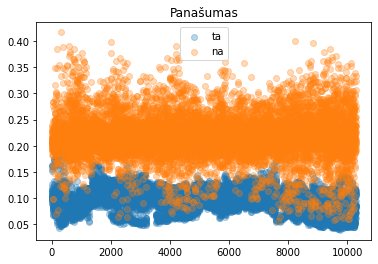

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:09<00:00,  6.48s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [26:02<00:00,  1.56s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train25-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 11s 3ms/step
(10, 3, 224, 224, 3)


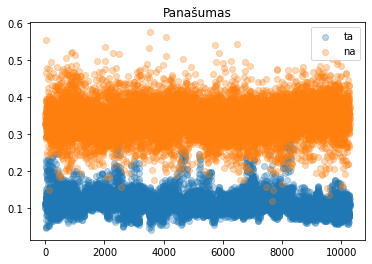

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:09<00:00,  6.47s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [25:59<00:00,  1.56s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train0-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 11s 3ms/step
(10, 3, 224, 224, 3)


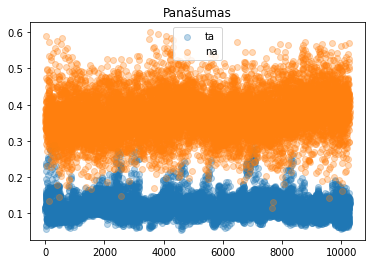

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:08<00:00,  6.40s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [25:42<00:00,  1.54s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train68-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 13s 3ms/step
(10, 3, 224, 224, 3)


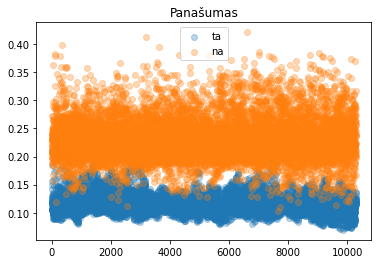

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:07<00:00,  6.39s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [26:03<00:00,  1.56s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train25-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 13s 3ms/step
(10, 3, 224, 224, 3)


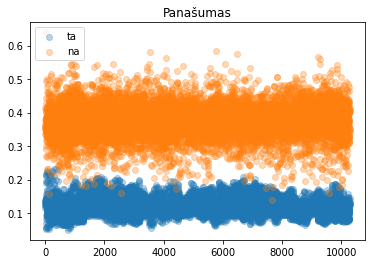

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:10<00:00,  6.53s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [25:56<00:00,  1.56s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train0-id64-od8-e6-b16
Skipped training, weight file already exists...
Calculating training stats...
3430/3430 [==============================] - 13s 3ms/step
(10, 3, 224, 224, 3)


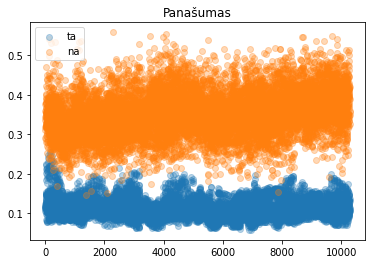

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:08<00:00,  6.42s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [26:03<00:00,  1.56s/it]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn111-train68-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn111-train111-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetB2 nn331-train331-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------


In [14]:
for options in efficient_b2_tests.generate_options():
    p1 = multiprocessing.Process(target=run_efficientb2_net, args=[options])

    p1.start()
    p1.join()